# BASIC CLASSIFICATION: FASHION CLOTHING CLASSIFICATION

Importing Dependencies

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


Importing Fashion MNIST Dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Each image is mapped to a single label. Since the class names are not included with the dataset, storing them here to use when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring The Data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

## Preprocessing The Data

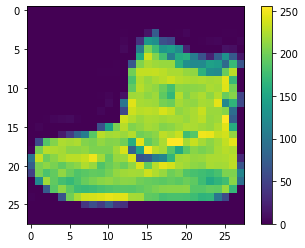

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Verifying That The Data is Correct and is ready to build and train the neural network.

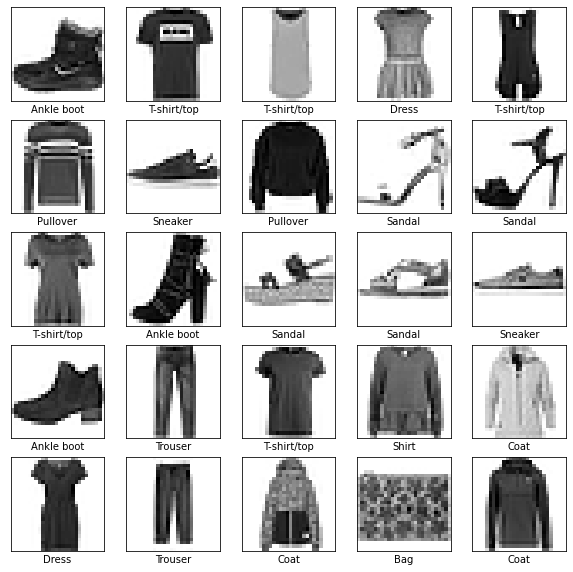

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Building the Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the Model

Feeding The Model

In [ ]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0833 - accuracy: 0.9688
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9692
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0831 - accuracy: 0.9689
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0782 - accuracy: 0.9706
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0783 - accuracy: 0.9705
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0793 - accuracy: 0.9710
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9711
Epoch 8/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0742 - accuracy: 0.9724
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0701 - accuracy: 0.9732
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

Evaluating the accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n Test accuracy:', test_acc)

313/313 - 0s - loss: 1.0657 - accuracy: 0.8861 - 412ms/epoch - 1ms/step

 Test accuracy: 0.8860999941825867


## Make Predictions

With the model trained, you can use it to make predictions about some images.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

Graphing This to look at the full set of 10 predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verifying the Predictions

With the trained model, let's use it to make predictions.

Let's look at the 0th image, predictions, and array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

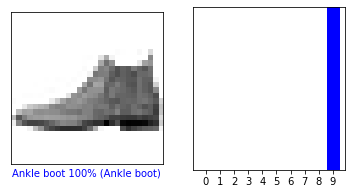

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's look at the 12th image, predictions, and array. Again, Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

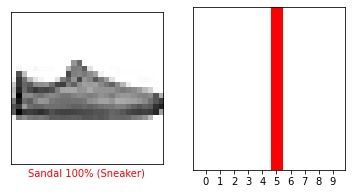

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. We need to remember that even though the model is confident, it can make mistakes and the output can be wrong.

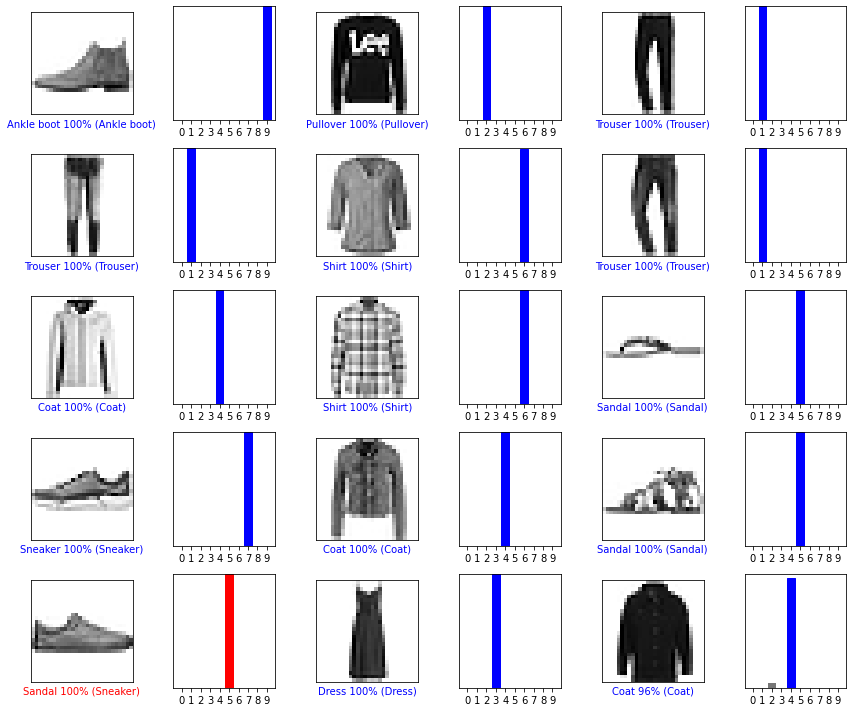

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Using the trained Model

Below here on the # Grab an image....
Enter the value inside the Square Brackets/ Hard Brackets.
inside test_images["Enter the value to see the desired output"] 

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Predicting the correct label for the image

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.0388035e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.7466927e-22 0.0000000e+00 1.0000000e+00 1.2380198e-36 2.1362767e-21]]


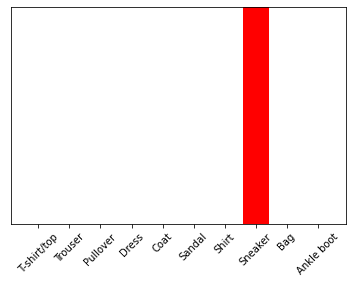

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

7